In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
# plt.style.use('fivethirtyeight') # For plots
sns.set_style("darkgrid")
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import os

In [2]:
#reading the excel file
sales = pd.read_excel("0120-AI___Data_Science_Bootcamp_Time-Series_Dataset.xlsx")
sales.head()

,Date,Total_Sales
0,2017-01-01,120000.0
1,2017-02-01,130000.0
2,2017-03-01,150000.0
3,2017-04-01,160000.0
4,2017-05-01,180000.0


In [3]:
#indexing the data set
sales.set_index('Date',inplace=True)

In [4]:
sales.head()

,Total_Sales
Date,
2017-01-01,120000.0
2017-02-01,130000.0
2017-03-01,150000.0
2017-04-01,160000.0
2017-05-01,180000.0


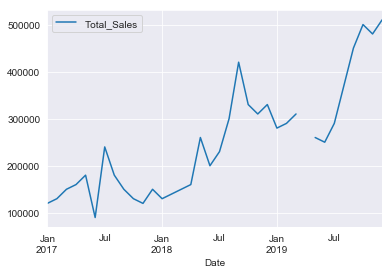

In [5]:
#plotting the dataset
sales.plot()
plt.show()

In [6]:
#find the NaNs locations
missIndex = sales['Total_Sales'].index[sales['Total_Sales'].apply(np.isnan)]
print(missIndex)

DatetimeIndex(['2019-04-01'], dtype='datetime64[ns]', name='Date', freq=None)


In [7]:
#get the average to replace NaN
sales.loc['2019-04-01'] = (sales.loc['2019-03-01'] + sales.loc['2019-05-01'])/2

print(sales.loc['2019-04-01'])

Total_Sales    285000.0
Name: 2019-04-01 00:00:00, dtype: float64


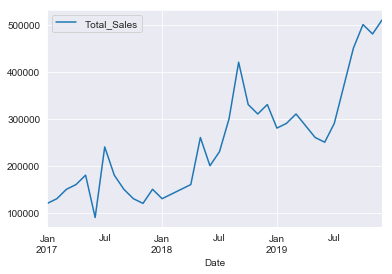

In [8]:
sales.plot()
plt.show()

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2017-01-01 to 2019-12-01
Data columns (total 1 columns):
Total_Sales    36 non-null float64
dtypes: float64(1)
memory usage: 1.8 KB


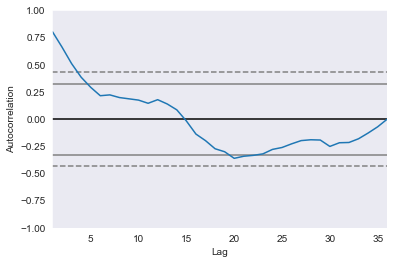

In [10]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sales)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.Total_Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -429.618
Method:                       css-mle   S.D. of innovations          51791.196
Date:                Tue, 28 Jan 2020   AIC                            873.236
Time:                        13:07:14   BIC                            884.124
Sample:                    02-01-2017   HQIC                           876.994
                         - 12-01-2019                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.117e+04   6926.433      1.613      0.118   -2402.718    2.47e+04
ar.L1.D.Total_Sales    -0.2219      0.167     -1.328      0.195      -0.549       0.106
ar.L2.D.Total_Sa

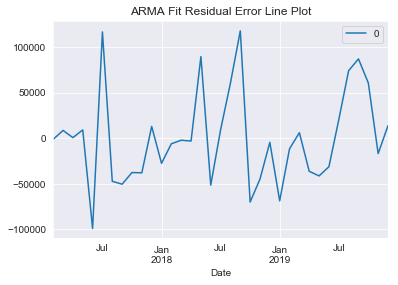

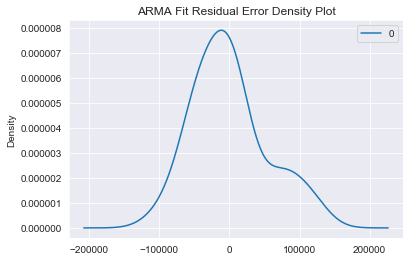

                   0
count      35.000000
mean      -31.017170
std     52547.539650
min    -99004.692642
25%    -37751.178973
50%     -3027.086321
75%     13398.644343
max    117819.304923


In [11]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(sales, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()
print(residuals.describe())

predicted=398778.434056, expected=330000.000000
predicted=403900.708634, expected=280000.000000
predicted=319022.694557, expected=290000.000000
predicted=293560.828504, expected=310000.000000
predicted=312366.427255, expected=285000.000000
predicted=297232.769401, expected=260000.000000
predicted=279942.192336, expected=250000.000000
predicted=269273.043463, expected=290000.000000
predicted=281097.926298, expected=370000.000000
predicted=334747.116029, expected=450000.000000
predicted=424003.343676, expected=500000.000000
predicted=498546.530323, expected=480000.000000
predicted=491694.866390, expected=510000.000000
Test MSE: 4022854866.558


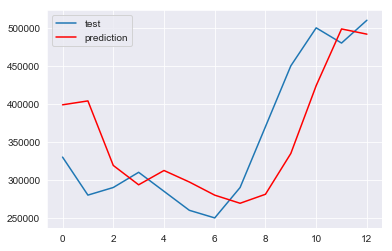

In [12]:
from sklearn.metrics import mean_squared_error

X = sales.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=-1)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()

In [13]:
predictions_ARIMA = pd.Series(model_fit.fittedvalues, copy=True)
print(predictions_ARIMA.head())

0    10614.639371
1    10739.110844
2     8623.282057
3    10015.713568
4     8153.786925
dtype: float64


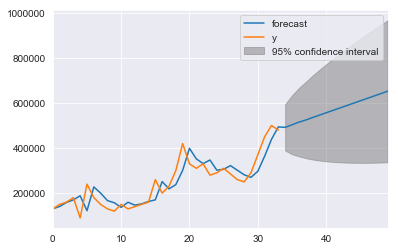

In [23]:
model_fit.plot_predict(1,50)
plt.show()

In [ ]:
or